## Import Data from Sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() 
X = iris.data 
target = iris.target 
names = iris.target_names

#print('The data matrix:\n',iris['data'])
#print('The classification target:\n',iris['target'])
print('The names of the dataset columns:\n',iris['feature_names'])
print('The names of target classes:\n',iris['target_names'])
#print('The full description of the dataset:\n',iris['DESCR'])
#print('The path to the location of the data:\n',iris['filename'])

The names of the dataset columns:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The names of target classes:
 ['setosa' 'versicolor' 'virginica']


## Preparing the data

In [2]:
# create index for the DataFrame
species=[]
for item in iris.target:
    if item == 0:
        species.append('setosa')
    elif item ==1:
        species.append('versicolor')
    else:
        species.append('virginica')

In [3]:
# Create a DataFrame from Iris Data
data = pd.DataFrame(iris.data, index=species,columns=iris['feature_names'])
data.reset_index(inplace=True)
data.rename(columns={'index':'species'},inplace=True)
data.head()

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [18]:
#Data used in the course
versicolor_petal_length = data.loc[data.species=="versicolor","petal length (cm)"]
setosa_petal_length=data.loc[data.species=="setosa","petal length (cm)"]
virginica_petal_length=data.loc[data.species=="virginica","petal length (cm)"]
print(versicolor_petal_length.head())

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64


### Plotting a histogram of iris data

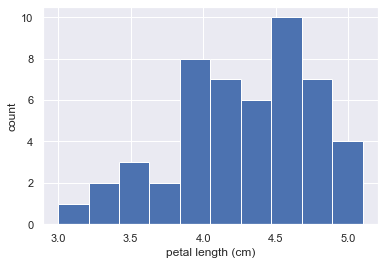

In [8]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

## Adjusting the number of bins in a histogram

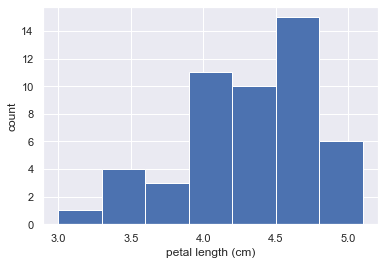

In [6]:
# Compute number of data points: n_data
n_data=len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins= int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length,bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

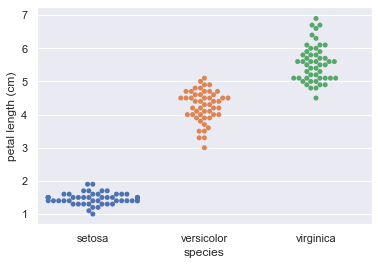

In [10]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)',data = data)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')
# Show the plot
plt.show()


## Computing the ECDF

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


## Plotting the ECDF

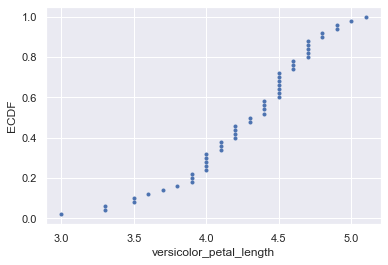

In [13]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers,y_vers,marker ='.',linestyle='none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')


# Display the plot

plt.show()

## Comparison of ECDFs


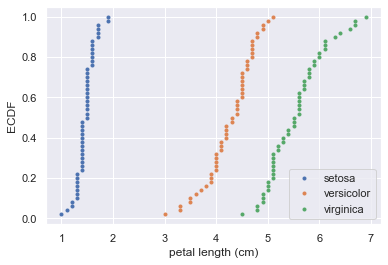

In [19]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot

_ = plt.plot(x_set, y_set,marker='.',linestyle = 'none')
_ = plt.plot(x_vers, y_vers,marker='.',linestyle = 'none')
_ = plt.plot(x_virg, y_virg,marker='.',linestyle = 'none')
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()